In [1]:
#Problem:
#   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
#   How well those variables describe the electric cycle demands?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency



In [2]:
df=pd.read_csv("C:/Users/DELL/Downloads/bike_sharing.csv")


In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [61]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [62]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [63]:
df.shape

(10886, 12)

In [64]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [65]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [66]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [67]:
df.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [5]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [6]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

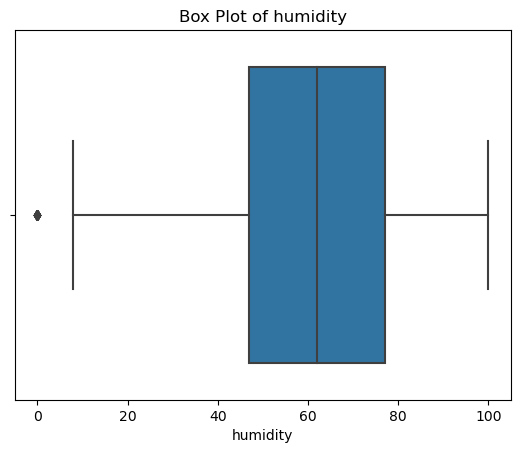

In [68]:
#Bi-Variate Analysis

#BOX PLOT
sns.boxplot(x=df['humidity'])
plt.xlabel('humidity')
plt.title('Box Plot of humidity')
plt.show()

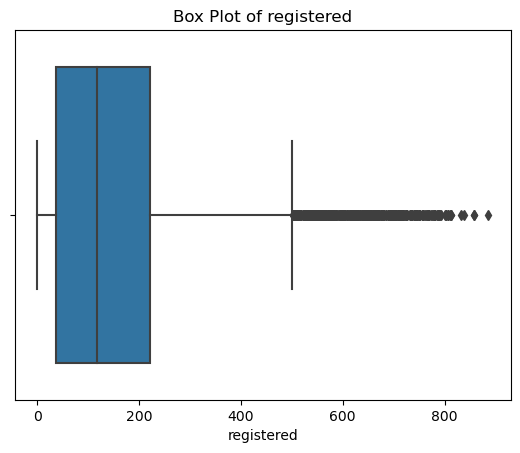

In [69]:
sns.boxplot(x=df['registered'])
plt.xlabel('registered')
plt.title('Box Plot of registered')
plt.show()

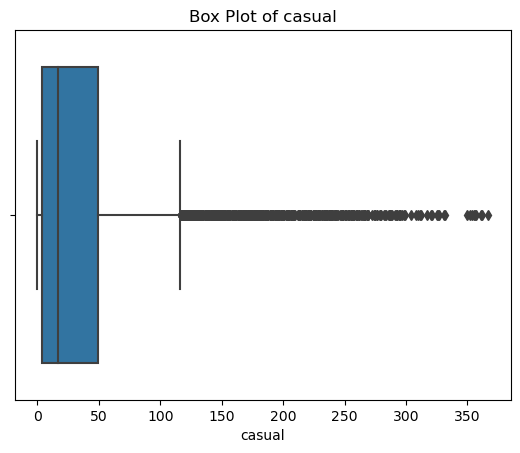

In [70]:
sns.boxplot(x=df['casual'])
plt.xlabel('casual')
plt.title('Box Plot of casual')
plt.show()

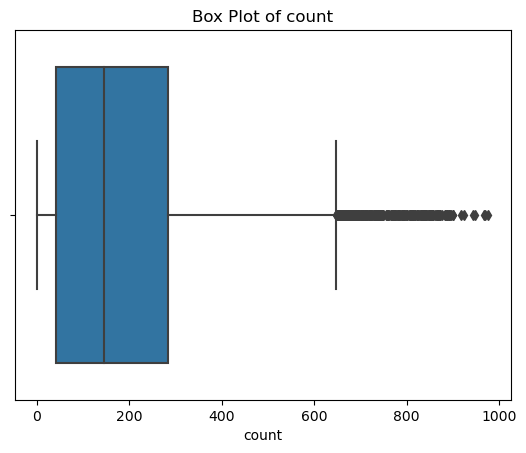

In [71]:
sns.boxplot(x=df['count'])
plt.xlabel('count')
plt.title('Box Plot of count')
plt.show()

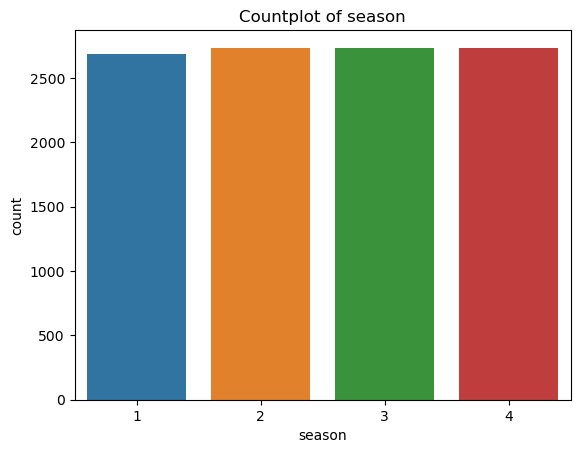

In [72]:
#CountPlot
sns.countplot(x=df['season'])
plt.xlabel('season')
plt.ylabel('count')
plt.title('Countplot of season')
plt.show()

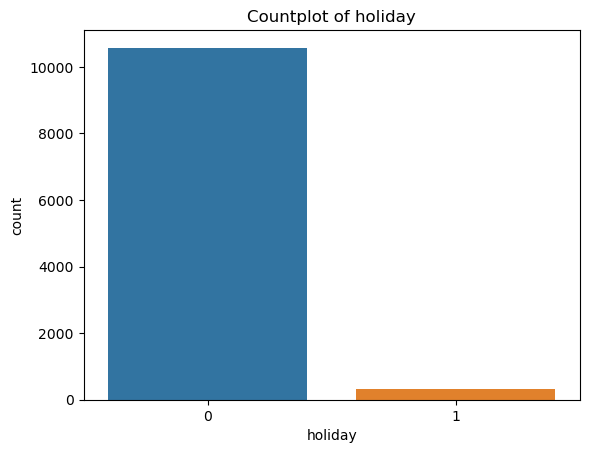

In [73]:
sns.countplot(x=df['holiday'])
plt.xlabel('holiday')
plt.ylabel('count')
plt.title('Countplot of holiday')
plt.show()

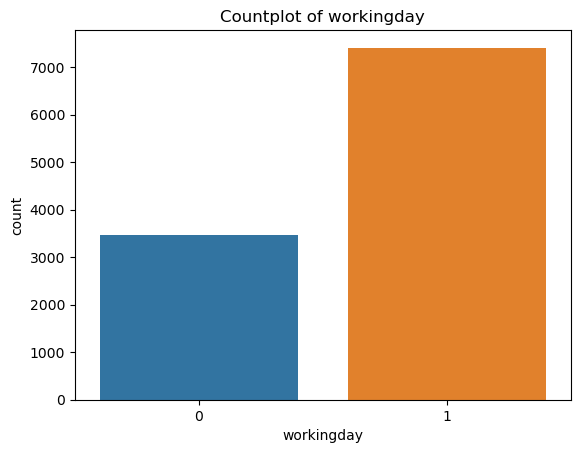

In [74]:
sns.countplot(x=df['workingday'])
plt.xlabel('workingday')
plt.ylabel('count')
plt.title('Countplot of workingday')
plt.show()

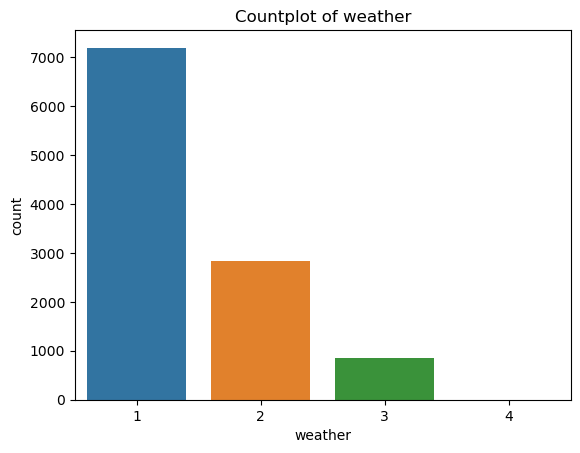

In [75]:
sns.countplot(x=df['weather'])
plt.xlabel('weather')
plt.ylabel('count')
plt.title('Countplot of weather')
plt.show()

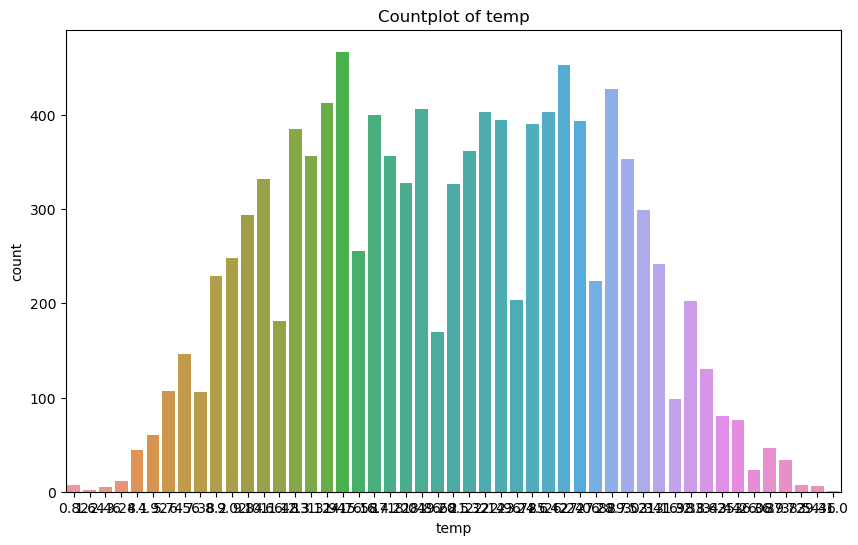

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['temp'])
plt.xlabel('temp')
plt.ylabel('count')
plt.title('Countplot of temp')
plt.show()

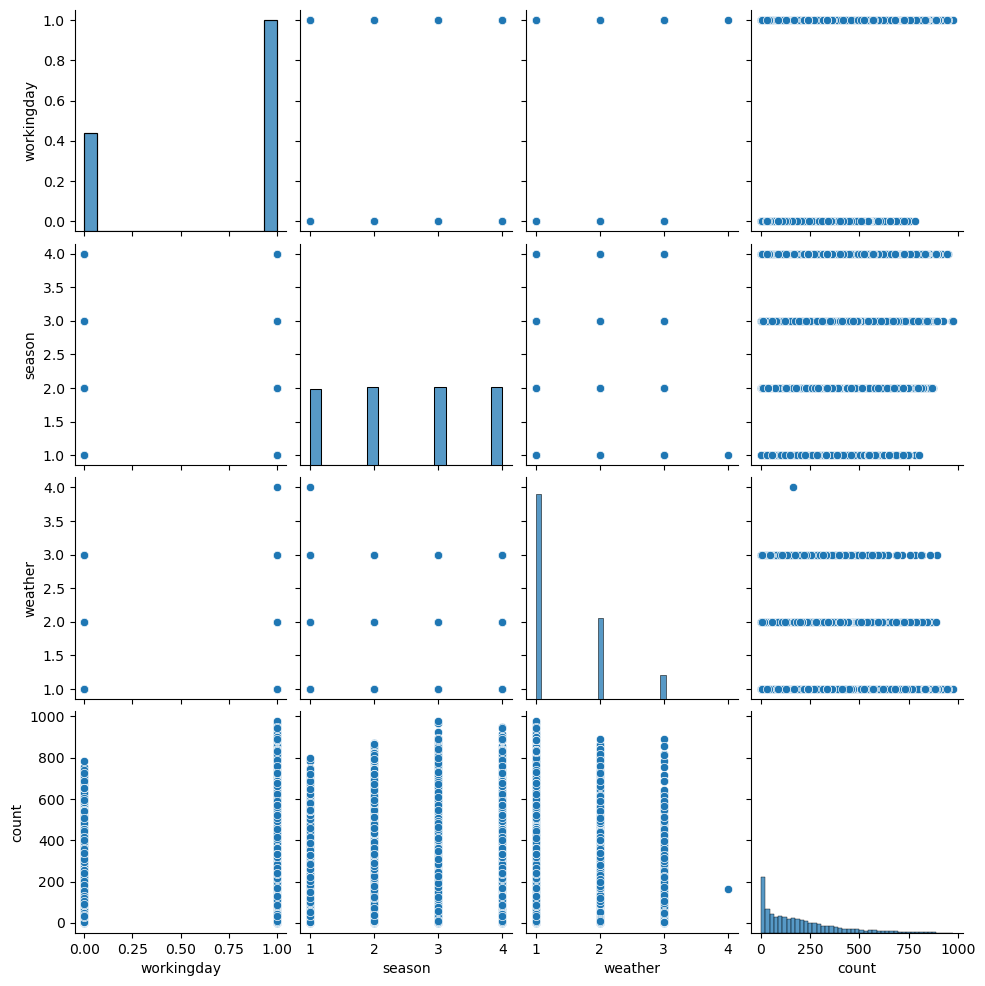

In [79]:
#Bi Variate Analysis
# We can also use pair plots for an overview of all variables
sns.pairplot(df[['workingday','season','weather','count']])
plt.show()

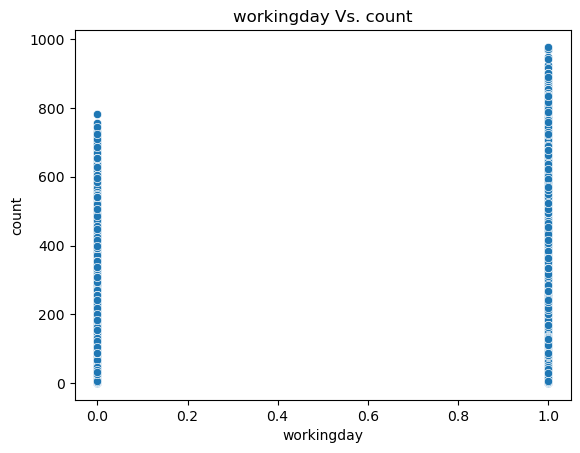

In [86]:
#Relationship Between working day Vs. count
sns.scatterplot(x='workingday',y='count',data=df)
plt.title('workingday Vs. count')
plt.show()

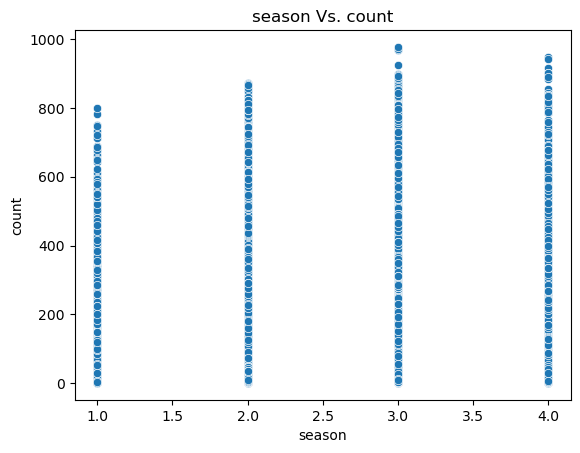

In [87]:
#Relationship Between season Vs. count
sns.scatterplot(x='season',y='count',data=df)
plt.title('season Vs. count')
plt.show()

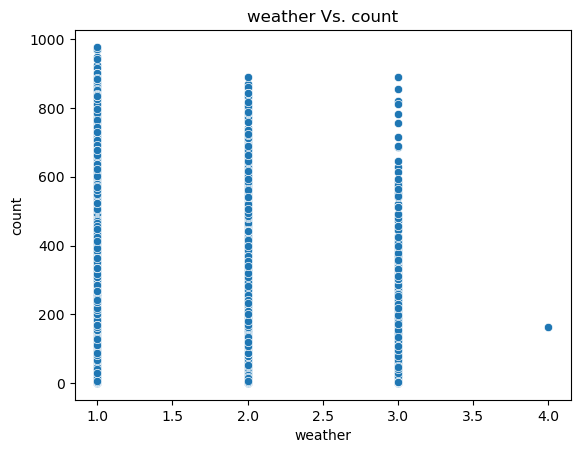

In [88]:
#Relationship Between Weather Vs. count
sns.scatterplot(x='weather',y='count',data=df)
plt.title('weather Vs. count')
plt.show()

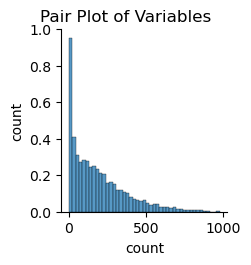

In [85]:
sns.pairplot(df[['workingday','season','weather','count']])
plt.suptitle('Pair Plot of Variables',y=1.02)
plt.show()

In [ ]:
# Illustrate the insights based on EDA
# Comments on range of attributes, outliers of various attributes
# Comments on the distribution of the variables and relationship between them
# Comments for each univariate and bivariate plots

In [ ]:
#Comments on range of attributes, outliers of various attributes

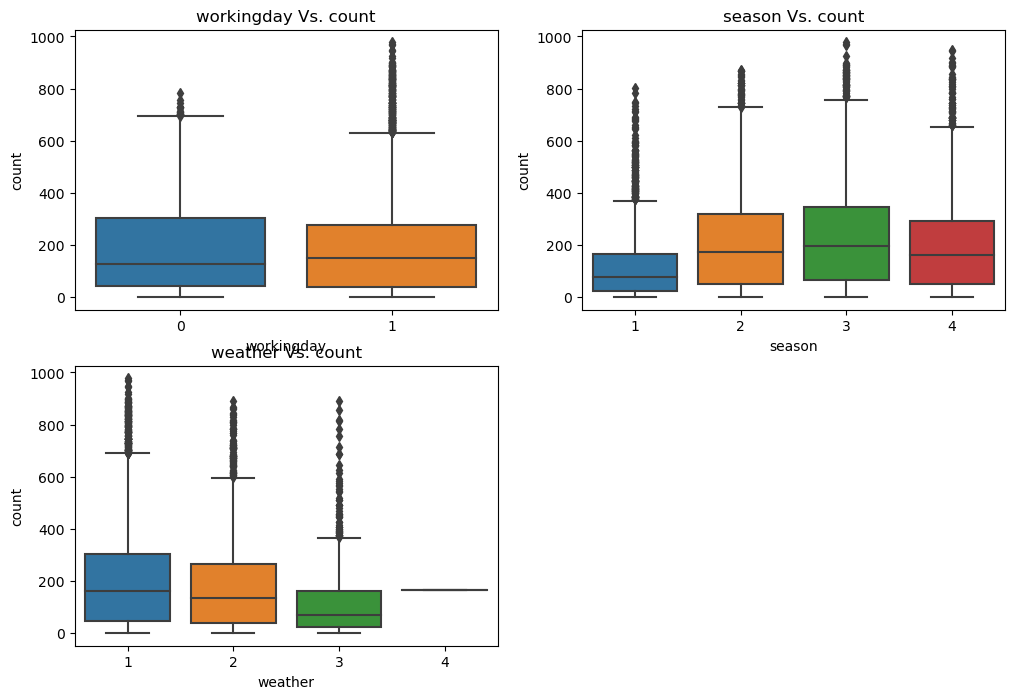

In [90]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x='workingday',y='count',data=df)
plt.title('workingday Vs. count')

plt.subplot(2,2,2)
sns.boxplot(x='season' ,y='count',data=df)
plt.title('season Vs. count')

plt.subplot(2,2,3)
sns.boxplot(x='weather',y='count',data=df)
plt.title('weather Vs. count')

plt.show()


In [91]:
#Comments on the distribution of the variables and relationship between them

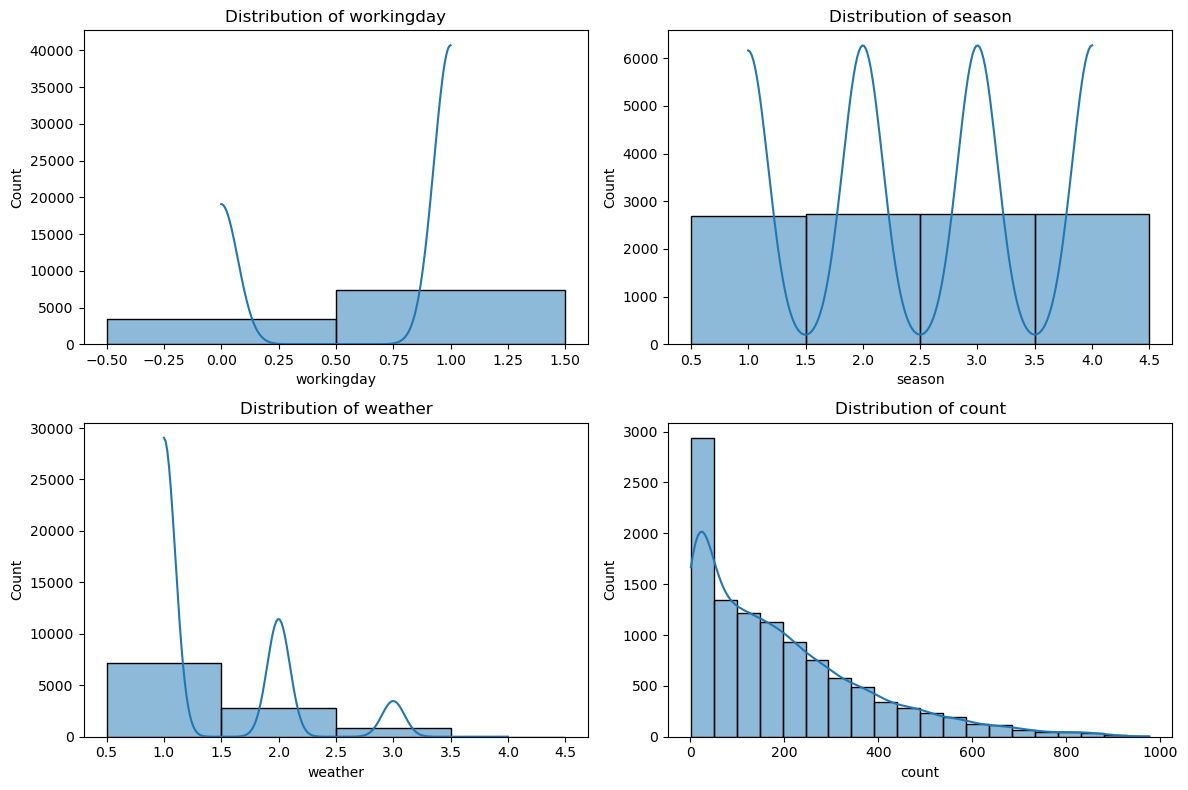

In [96]:
#Distribution of variables
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(df['workingday'],bins=20,kde=True)
plt.title('Distribution of workingday')

plt.subplot(2,2,2)
sns.histplot(df['season'],bins=20,kde=True)
plt.title('Distribution of season')

plt.subplot(2,2,3)
sns.histplot(df['weather'],bins=20,kde=True)
plt.title('Distribution of weather')

plt.subplot(2,2,4)
sns.histplot(df['count'],bins=20,kde=True)
plt.title('Distribution of count')

plt.tight_layout()
plt.show()

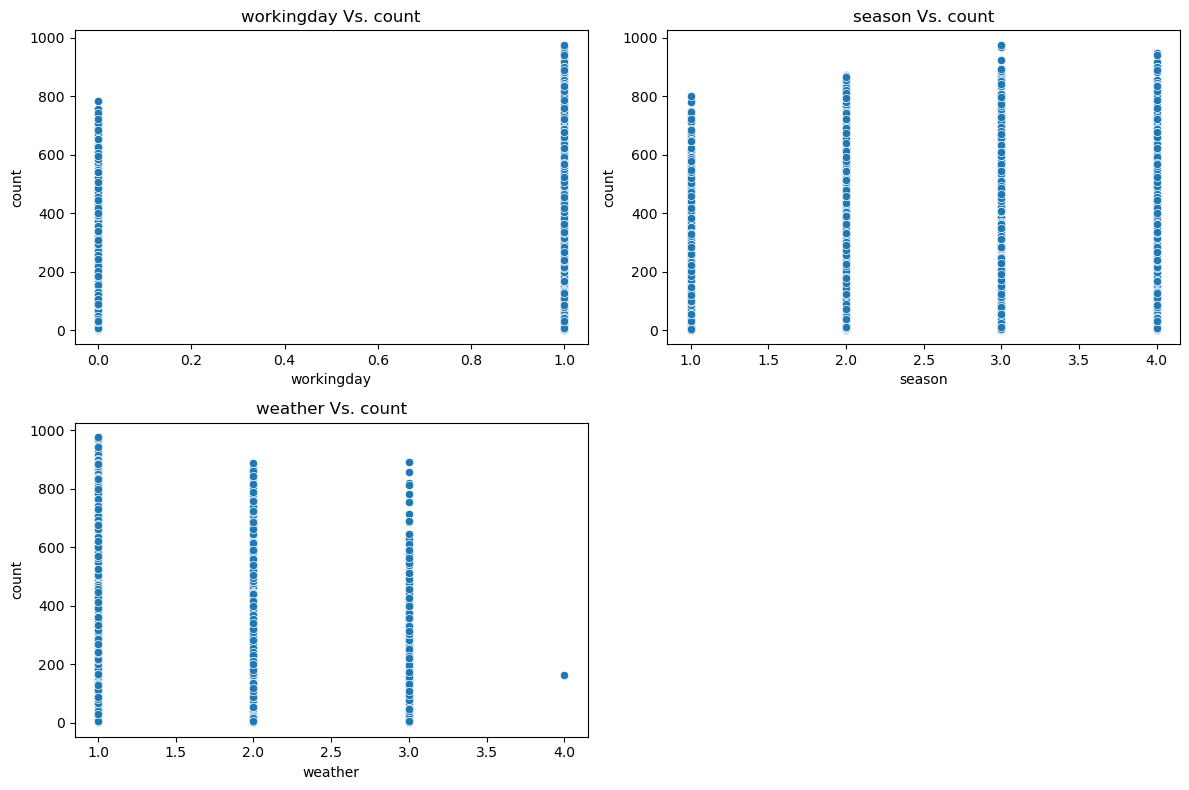

In [97]:
#Relationship  between Variables
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.scatterplot(x='workingday',y='count',data=df)
plt.title('workingday Vs. count')

plt.subplot(2,2,2)
sns.scatterplot(x='season',y='count',data=df)
plt.title('season Vs. count')

plt.subplot(2,2,3)
sns.scatterplot(x='weather',y='count',data=df)
plt.title('weather Vs. count')

plt.tight_layout()
plt.show()

In [98]:
# Hypothesis Testing:
# 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented 

In [ ]:
# Working Days Vs. Number of Electric Cycles Rented:
Appropiate Test:
Two sample t_test(assuming you have two groups,workingday and non_workingday)
why:
To compare the means of two independent groups. 
Null Hypothesis(H0):There is no significant difference in the mean number of electric cycles rented between workingdays and non-workingdays.
Alternative Hypothesis(H1): There is significant difference in the mean number of electric cycles rented between workingdays and non-workingdays.   

In [99]:
from scipy.stats import ttest_ind
#seperate data in two groups:
#Workingday or non_workingday
workingday=df[df['workingday']==1]['count']
non_workingday=df[df['workingday']==0]['count']


Text(0.5, 1.0, 'non_workingday data distribution')

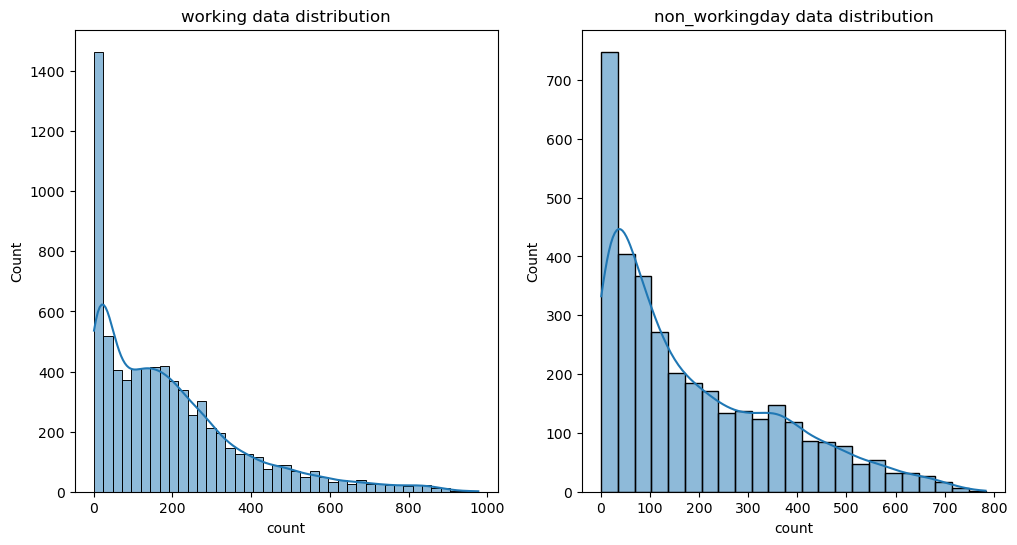

In [123]:
#Check Normality

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(workingday,kde=True)
plt.title('working data distribution')
plt.subplot(1,2,2)
sns.histplot(non_workingday,kde=True)
plt.title('non_workingday data distribution')

In [100]:
#Perform two sample t-test
t_statistics,p_value=ttest_ind(workingday,non_workingday)
print(f'T_statistics:{t_statistics}')
print(f'P_value:{p_value}')



T_statistics:1.2096277376026694
P_value:0.22644804226361348


In [102]:
#Interpret the results
alpha=0.05
if p_value<alpha:
    print("Reject the null hypothesis.There is a significant difference")
else:
    print("Fail to reject the null hypothesis.No significant difference.")
    

Fail to reject the null hypothesis.No significant difference.


In [103]:
# ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season


In [ ]:
Appropiate Test:
Analysis of Vriance(ANOVA)

Why:
To compare means across more than two groups(seasons,weather,in this case) 

Null Hypothesis(H0):There is no significant difference in the mean number of cycles rented across different seasons and weather conditions.
Alternative Hypothesis(H1): There is significant difference in the mean number of cycles rented across different seasons and weather conditions.   

In [104]:
from scipy.stats import f_oneway
#seperate the data into groups based on weather and season
weather_group=[df[df['weather']==i]['count']
for i in df['weather'].unique()]
season_group=[df[df['season']==j]['count']
             for j in df['season'].unique()]


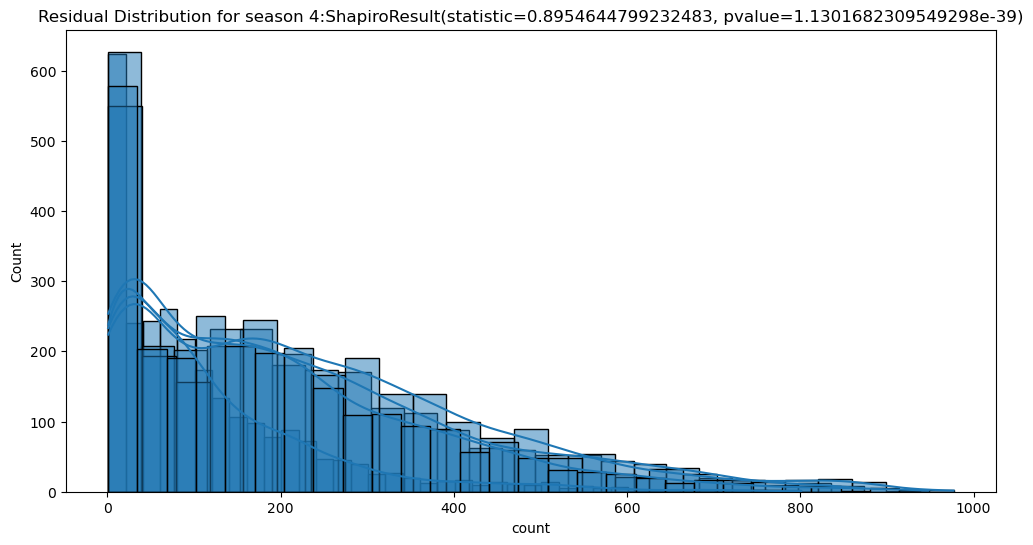

In [130]:
#Check Normality
from scipy .stats import shapiro
plt.figure(figsize=(12,6))
for season in df['season'].unique():
    season_data=df[df['season']==season]['count']
    p_value_residual=shapiro(season_data)
    
    sns.histplot(season_data,kde=True)
    plt.title(f'Residual Distribution for season {season}:{p_value_residual}')


In [105]:
#Perform Anova
weather_anova_result=f_oneway(*weather_group)
season_anova_result=f_oneway(*season_group)

In [106]:
weather_anova_result

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [107]:
season_anova_result

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [109]:
print("Anova for weather:")
print(f'F-Statistic:{weather_anova_result.statistic}')
print(f'P-value:{weather_anova_result.pvalue}')


Anova for weather:
F-Statistic:65.53024112793271
P-value:5.482069475935669e-42


In [110]:
print("Anova for season:")
print(f'F-Statistic:{season_anova_result.statistic}')
print(f'P-value:{season_anova_result.pvalue}')


Anova for season:
F-Statistic:236.94671081032106
P-value:6.164843386499654e-149


In [111]:
#Interpret the result
alpha=0.05
if weather_anova_result.pvalue<alpha:
    print("Reject the null hypothesis for weather.There is a significant difference.")
else:
    print("Fail to reject the null hypothesis for weather.No significant difference.")
    

Reject the null hypothesis for weather.There is a significant difference.


In [112]:
alpha=0.05
if season_anova_result.pvalue<alpha:
    print("Reject the null hypothesis for season.There is a significant difference.")
else:
    print("Fail to reject the null hypothesis for season.No significant difference.")
    

Reject the null hypothesis for season.There is a significant difference.


In [117]:
#Chi-square test to check if Weather is dependent on the season

In [ ]:
Appropriate Test:
Chi_square test for independence.

why:
To examine the associate between two categorical variables(weather and season)   

Null Hypothesis(H0):Weather and season are independent;there is no association between them.
Alternative Hypothesis(H1):Weather and season are not independent;there is an association between them.
       
    

In [113]:
#Chi-square test to check if Weather is dependent on the season
from scipy.stats import chi2_contingency
#Create a contingency table
contingency_table=pd.crosstab(df['weather'],df['season'])


In [114]:
#Perform the chi_square test
chi2_stat,p_value,dof,expected=chi2_contingency(contingency_table)


In [118]:
#Print the result
print(f'Chi_Square Statistic:{chi2_stat}')
print(f'P_value:{p_value}')
print(f'Degrees of Freedom:{dof}')
print('Expected Frequencies:')
print(expected)

Chi_Square Statistic:49.15865559689363
P_value:1.5499250736864862e-07
Degrees of Freedom:9
Expected Frequencies:
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [119]:
#Interpret the result
alpha=0.05
if p_value<alpha:
    print("Reject the null hypothesis.Weather is dependent on the season.")
else:
    print("Fail to reject the null hypothesis.weather is dependent of the season.")
    

Reject the null hypothesis.Weather is dependent on the season.


In [ ]:
INSIGHTS
1.The rental bikes including both casual and registered are on demand in clear weather.
2.In boxplot distribution casual bike users are between the range 0-50.
3.Their is least (only 1) bike users in heavy rain weather & in clear weather bike user are 7192(most).
4.Their are 7412(more) rental bikes users including both casual and registered in workingdays.
5.T-test showing there is no significant difference in the mean number of electric cycles rented between workingdays and non-workingdays.
6.There is significant difference in the mean number of cycles rented across different seasons and weather conditions.   

In [ ]:
RECOMMENDATIONS
1.We should make marketing strategies to boost electric cycle rentals on non_working days.
2.Understanding the patterns associated with working days can help optimize business.
3.We should focus on marketing efforts to capitalize on high-demand seasons.
4.Implement flexible strategies.For Example-offering discount during  unfavourable weather.
5.Regularly monitor rental patterns,especially during significant weather changes or seasonal transitions.
6.Collect and analyze customer feedback to understand prefrences and factors influencing rental decisions.